<a href="https://colab.research.google.com/github/sanskarsharma33/125_SanskarSharma/blob/main/Lab4/Lab_04_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# **Roll no. 125 - Task1 performed on Dataset3**

In [3]:
# reading data into main_data

main_data = pd.read_csv("/content/drive/MyDrive/Sem7/Lab3/Dataset3.csv")
encoded_data = main_data

print("\n\n Main Data :-\n", main_data)
target = main_data['Class']
main_data.drop('Class',axis='columns', inplace=True)

for data in main_data:
  dummies = pd.get_dummies(main_data[data])
  encoded_data = pd.concat([encoded_data,dummies],axis='columns')
  encoded_data = encoded_data.drop([data],axis='columns')

print(f"\n\nAfter the tranformation")
print(encoded_data)



 Main Data :-
    Outlook Temp Wind  Humidity  Class
0        R    H    F         1      0
1        R    H    T         2      0
2        O    H    F         1      1
3        R    M    F         1      1
4        S    C    F         1      1
5        O    C    T         0      0
6        O    C    T         1      1
7        R    M    F         1      0
8        O    C    F         0      1
9        S    M    F         2      1
10       R    C    T         2      0
11       O    M    T         0      1
12       O    H    F         1      1
13       S    M    T         1      0


After the tranformation
    O  R  S  C  H  M  F  T  0  1  2
0   0  1  0  0  1  0  1  0  0  1  0
1   0  1  0  0  1  0  0  1  0  0  1
2   1  0  0  0  1  0  1  0  0  1  0
3   0  1  0  0  0  1  1  0  0  1  0
4   0  0  1  1  0  0  1  0  0  1  0
5   1  0  0  1  0  0  0  1  1  0  0
6   1  0  0  1  0  0  0  1  0  1  0
7   0  1  0  0  0  1  1  0  0  1  0
8   1  0  0  1  0  0  1  0  1  0  0
9   0  0  1  0  0  1  1  0 

In [19]:
# train test division 85% - 15% because my Roll No is 125
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
X_train, X_test, Y_train, Y_test = train_test_split(encoded_data, target, test_size = 0.15, random_state = 125)


# Create a decisionTreeCalssifier object
dtc = DecisionTreeClassifier(criterion = "gini")
dtc.fit(X_train, Y_train)
Y_predicted = dtc.predict(X_test)

print(Y_predicted)

[0 0 0]


In [20]:
from sklearn import metrics

print(f"Accuracy is :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy is :- 0.3333333333333333


Confusion matrix:
[[1 0]
 [2 0]]


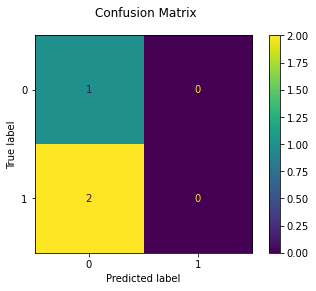

In [21]:
disp = metrics.plot_confusion_matrix(dtc, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

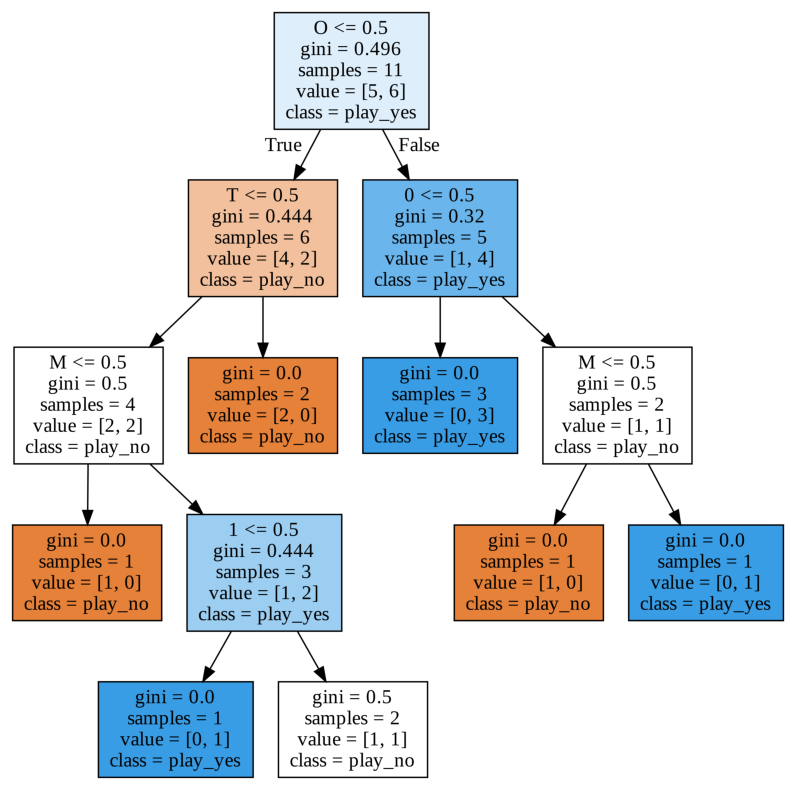

In [23]:
import tkinter

from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file='tree_gini.dot',
               feature_names=['O', 'R', 'S', 'C','H', 'M' ,'F', 'T', '0', '1', '2'],
               class_names=['play_no','play_yes'], 
               filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_gini.dot', '-o', 'tree_gini.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_gini.png'))
plt.axis('off');
plt.show();